In [10]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
from google.colab import files
files.upload()

Saving Once_Upon_A_Thai_Reviews.csv to Once_Upon_A_Thai_Reviews.csv


{'Once_Upon_A_Thai_Reviews.csv': b'\xef\xbb\xbfRating,Review_Text,Date\r\n2,"We bought pad Thai, minced chicken salad and rice salad rolls. I\xe2\x80\x99ve had a lot of pad Thai throughout my life and sadly this was the least liked. Personally, I have found I Am Thai the best; just thought I would try someone else\xe2\x80\x99s pad Thai. My wife ordered the minced chicken salad and it was a very small dish for the price; it said absolutely nothing about spice and it was spicy, she couldn\xe2\x80\x99t eat it. Fortunately I got some extra rice salad rolls and she loved those; the peanut sauce that came with it was looking cogeald. Our son will eat anything so he\xe2\x80\x99ll eat what we don\xe2\x80\x99t, just so it doesn\xe2\x80\x99t go to waste.",15-03-2025\r\n5,null,12-03-2023\r\n1,"Food was ok. Good service. They had a poster incentivizing reviews, which is against Google regulations, and regulations of any other major platforms.""Google\'s Stance on Review IncentivesGoogle has a clea

In [17]:
results_df = pd.read_csv('Once_Upon_A_Thai_Reviews.csv')

In [12]:
# Initialize VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [13]:
# Function to extract positive & negative words safely
def extract_sentiment_words(Review_Text):
    if not isinstance(Review_Text, str):
        return "", ""
    words = Review_Text.split()
    positive_words = [word for word in words if sia.polarity_scores(word)['compound'] > 0]
    negative_words = [word for word in words if sia.polarity_scores(word)['compound'] < 0]
    return " ".join(positive_words), " ".join(negative_words)

In [18]:
# Apply function to extract sentiment words
results_df['positive_words'], results_df['negative_words'] = zip(*results_df['Review_Text'].map(extract_sentiment_words))

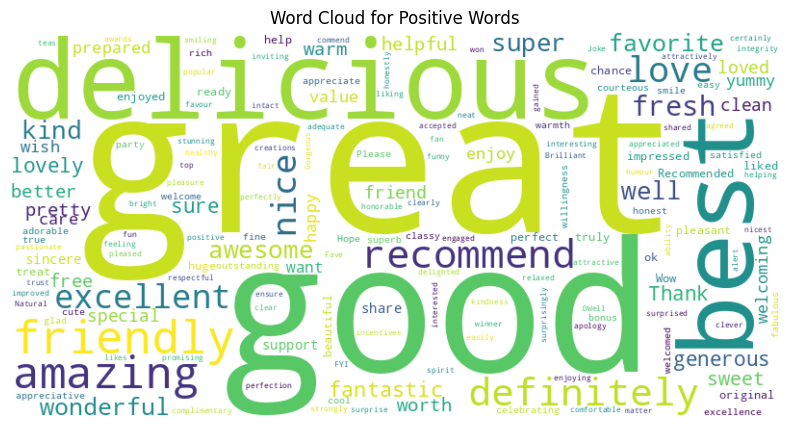

In [23]:
# Generate word clouds

# Positive Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(" ".join(results_df['positive_words']))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Words")
plt.show()


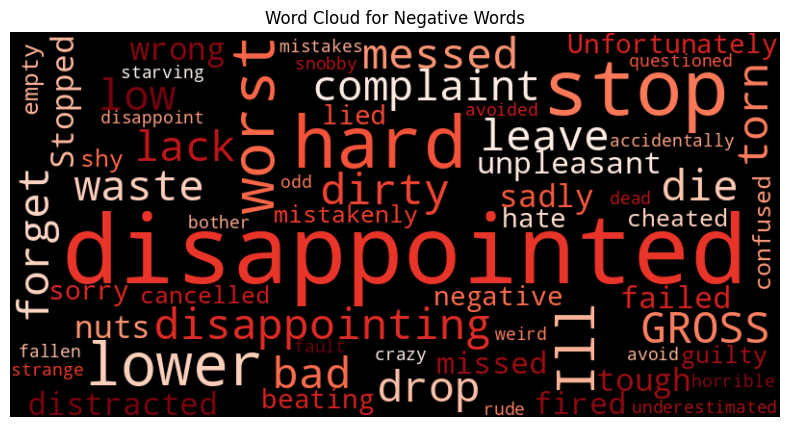

In [20]:
# Negative Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(" ".join(results_df['negative_words']))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Words")
plt.show()
